In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("bikes_rent.csv")
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.805490,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.443949,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.437060,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,4.800998,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,5.597810,1600


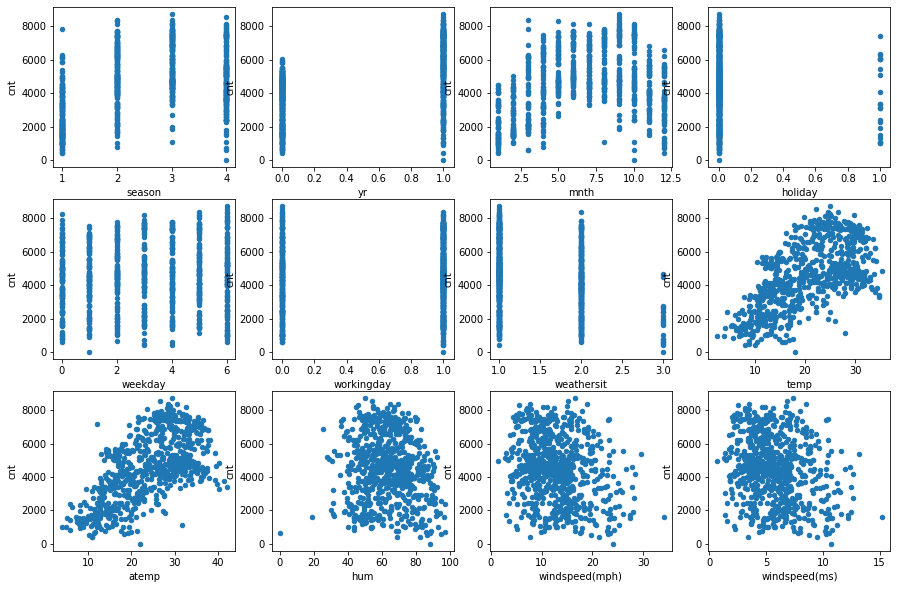

In [4]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
for idx, feature in enumerate(df.columns[:-1]):
    df.plot(feature, "cnt", subplots=True, kind="scatter", ax=axes[idx // 4, idx % 4])

Блок 1. Ответьте на вопросы (каждый 0.5 балла):
1. Каков характер зависимости числа прокатов от месяца?
      * ответ: нелинейно
2. Укажите один или два признака, от которых число прокатов скорее всего зависит линейно
    * ответ: temp, atemp

In [5]:
# Код 1.1 (0.5 балла)
# Посчитайте корреляции всех признаков, кроме последнего, с последним с помощью метода corrwith:
df.iloc[:,1:-2].corrwith(df['cnt'])

yr                0.566710
mnth              0.279977
holiday          -0.068348
weekday           0.067443
workingday        0.061156
weathersit       -0.297391
temp              0.627494
atemp             0.631066
hum              -0.100659
windspeed(mph)   -0.234545
dtype: float64

In [6]:
# Код 1.2 (0.5 балла)
# Посчитайте попарные корреляции между признаками temp, atemp, hum, windspeed(mph), windspeed(ms) и cnt
# с помощью метода corr:
df[['temp', 'atemp', 'hum', 'windspeed(mph)', 'windspeed(ms)', 'cnt']].corr()

,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
temp,1.000000,0.991702,0.126963,-0.157944,-0.157944,0.627494
atemp,0.991702,1.000000,0.139988,-0.183643,-0.183643,0.631066
hum,0.126963,0.139988,1.000000,-0.248489,-0.248489,-0.100659
windspeed(mph),-0.157944,-0.183643,-0.248489,1.000000,1.000000,-0.234545
windspeed(ms),-0.157944,-0.183643,-0.248489,1.000000,1.000000,-0.234545
cnt,0.627494,0.631066,-0.100659,-0.234545,-0.234545,1.000000


In [7]:
# Код 1.3 (0.5 балла)
# Выведите средние признаков
df.mean()

season               2.496580
yr                   0.500684
mnth                 6.519836
holiday              0.028728
weekday              2.997264
workingday           0.683995
weathersit           1.395349
temp                20.310776
atemp               23.717699
hum                 62.789406
windspeed(mph)      12.762576
windspeed(ms)        5.705220
cnt               4504.348837
dtype: float64

In [8]:
from sklearn.preprocessing import scale
from sklearn.utils import shuffle

In [9]:
df_shuffled = shuffle(df, random_state=123)
X = scale(df_shuffled[df_shuffled.columns[:-1]])
y = df_shuffled["cnt"]

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
# Код 2.1 (1 балл)
# Создайте объект линейного регрессора, обучите его на всех данных и выведите веса модели 
# (веса хранятся в переменной coef_ класса регрессора).
# Можно выводить пары (название признака, вес), воспользовавшись функцией zip, встроенной в язык python
# Названия признаков хранятся в переменной df.columns
linear_regressor = LinearRegression()

In [12]:
linear_regressor.fit(X, y)
predictions = linear_regressor.predict(X)
print(linear_regressor.coef_)

[ 5.70866971e+02  1.02196392e+03 -1.41301612e+02 -8.67604319e+01
  1.37226248e+02  5.63916226e+01 -3.30231844e+02  3.67461425e+02
  5.85569174e+02 -1.45610430e+02  1.24575770e+13 -1.24575770e+13]


In [13]:
def print_coef_name(name,w):
    print(list(zip(name,w)))

print_coef_name(df.columns,linear_regressor.coef_)

[('season', 570.8669705952359), ('yr', 1021.9639193563858), ('mnth', -141.30161186662224), ('holiday', -86.760431877055), ('weekday', 137.2262481763967), ('workingday', 56.39162259686522), ('weathersit', -330.23184351625554), ('temp', 367.4614249114307), ('atemp', 585.5691735578079), ('hum', -145.61043001494383), ('windspeed(mph)', 12457576985764.564), ('windspeed(ms)', -12457576985963.018)]


In [14]:
from sklearn.linear_model import Lasso, Ridge

In [15]:
# Код 2.2 (0.5 балла)
# Обучите линейную модель с L1-регуляризацией и выведите веса
lasso_regressor = Lasso(random_state = 3)
lasso_regressor.fit(X, y)
print_coef_name(df.columns,lasso_regressor.coef_)

[('season', 560.2416160308867), ('yr', 1019.4634940657195), ('mnth', -128.73062703678738), ('holiday', -86.15278133371125), ('weekday', 137.34789390496329), ('workingday', 55.212370641356586), ('weathersit', -332.3698569623487), ('temp', 376.3632362096977), ('atemp', 576.5307935045521), ('hum', -144.1291550034861), ('windspeed(mph)', -197.1396894024865), ('windspeed(ms)', -2.8049174615126408e-08)]


In [16]:
# Код 2.3 (0.5 балла)
# Обучите линейную модель с L2-регуляризацией и выведите веса
ridge_regressor = Ridge(random_state = 3)
ridge_regressor.fit(X,y)
print_coef_name(df.columns,ridge_regressor.coef_)

[('season', 563.0645722520123), ('yr', 1018.9483787875288), ('mnth', -131.87332028247235), ('holiday', -86.74609799709248), ('weekday', 138.00511117871906), ('workingday', 55.90311037506458), ('weathersit', -332.34978849907293), ('temp', 386.4578891919271), ('atemp', 566.3470470600492), ('hum', -145.0713272986726), ('windspeed(mph)', -99.25944108184078), ('windspeed(ms)', -99.25944115429242)]


In [17]:
alphas = np.arange(1, 500, 50)
coefs_lasso = np.zeros((alphas.shape[0], X.shape[1])) # матрица весов размера (число регрессоров) x (число признаков)
coefs_ridge = np.zeros((alphas.shape[0], X.shape[1]))
# Для каждого значения коэффициента из alphas обучите регрессор Lasso
# и запишите веса в соответствующую строку матрицы coefs_lasso (вспомните встроенную в python функцию enumerate),
# а затем обучите Ridge и запишите веса в coefs_ridge.

In [18]:
alphas

array([  1,  51, 101, 151, 201, 251, 301, 351, 401, 451])

In [19]:
coefs_lasso[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [20]:
for num, alpha in enumerate(alphas, 0):
    
    lasso_regressor = Lasso(alpha = alpha, random_state = 3)
    lasso_regressor.fit(X, y)
    
    ridge_regressor = Ridge(alpha = alpha, random_state = 3)
    ridge_regressor.fit(X, y)
    
    coefs_lasso[num] = lasso_regressor.coef_
    coefs_ridge[num] = ridge_regressor.coef_

Визуализируем динамику весов при увеличении параметра регуляризации:



Text(0.5, 1.0, 'Ridge')

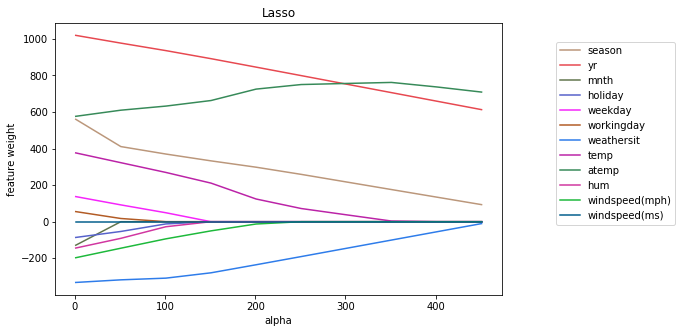

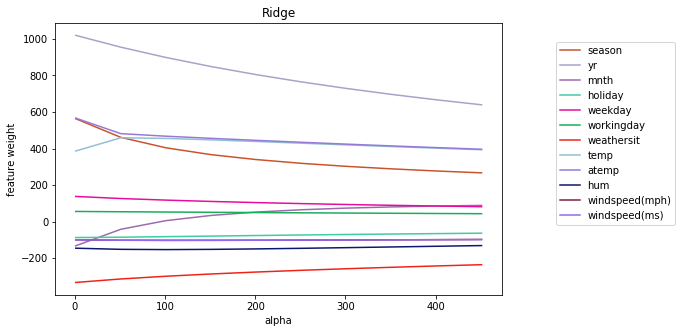

In [21]:
plt.figure(figsize=(8, 5))
for coef, feature in zip(coefs_lasso.T, df.columns):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3))
plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Lasso")

plt.figure(figsize=(8, 5))
for coef, feature in zip(coefs_ridge.T, df.columns):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3))
plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Ridge")

### Блок 2. Ответьте на вопросы (каждый 0.25 балла):



1. Какой регуляризатор (Ridge или Lasso) агрессивнее уменьшает веса при одном и том же alpha?
    * Ответ:Lasso
2. Что произойдет с весами Lasso, если alpha сделать очень большим? Поясните, почему так происходит.
    * Ответ: Они обнулятся, т.к. при Лассо признаки стремятся к нулу в функции минимизации.
* Можно ли утверждать, что Lasso исключает один из признаков windspeed при любом значении alpha > 0? А Ridge? Ситается, что регуляризатор исключает признак, если коэффициент при нем < 1e-3.
    * Ответ:Да,можно утверждать.По графику, вроде нет.
* Какой из регуляризаторов подойдет для отбора неинформативных признаков?
    * Ответ:Lasso

In [22]:
from sklearn.linear_model import LassoCV

In [23]:
# Код 3.2 (1 балл)
# Обучите регрессор LassoCV на всех параметрах регуляризации из alpha
# Постройте график _усредненного_ по строкам MSE в зависимости от alpha. 
# Выведите выбранное alpha, а также пары "признак-коэффициент" для обученного вектора коэффициентов
alphas = np.arange(1, 100, 5)

In [43]:
lacoscv_regressor = LassoCV(alphas = alphas, cv=3)
lacoscv_regressor.fit(X,y)

LassoCV(alphas=array([ 1,  6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81,
       86, 91, 96]),
        copy_X=True, cv=3, eps=0.001, fit_intercept=True, max_iter=1000,
        n_alphas=100, n_jobs=None, normalize=False, positive=False,
        precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
        verbose=False)

In [44]:
mse_path = lacoscv_regressor.mse_path_

In [45]:
alpha_lacoscv = lacoscv_regressor.alpha_

In [46]:
coef_lacoscv = lacoscv_regressor.coef_

In [47]:
alphas_lacoscv = lacoscv_regressor.alphas_

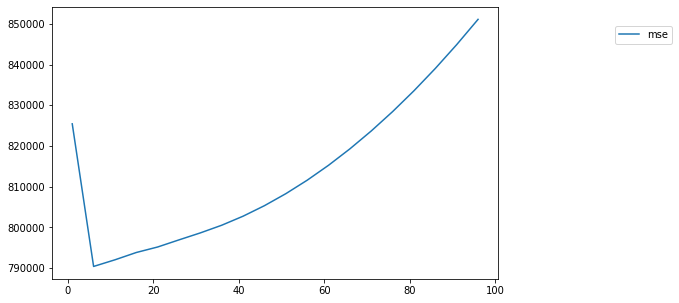

In [64]:
# Постройте график _усредненного_ по строкам MSE в зависимости от alpha. 
plt.figure(figsize=(8, 5))
plt.plot(alphas_lacoscv,mse_path.mean(axis =1 ), label='mse')
plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))

In [65]:
# Выведите выбранное alpha, а также пары "признак-коэффициент" для обученного вектора коэффициентов
print(alpha_lacoscv)
print_coef_name(name=df.columns,w=coef_lacoscv)

6
[('season', 532.0189828413535), ('yr', 1015.0602226430595), ('mnth', -100.03952614356622), ('holiday', -83.2939598752991), ('weekday', 132.50446549095793), ('workingday', 51.55708561407394), ('weathersit', -330.55985673998117), ('temp', 370.6798550300367), ('atemp', 581.3969310654954), ('hum', -140.0074055006889), ('windspeed(mph)', -191.77140847135027), ('windspeed(ms)', -2.6855024557067635e-08)]


In [71]:
# Выведите значения alpha, соответствующие минимумам MSE на каждом разбиении (то есть по столбцам).
# На трех отдельных графиках визуализируйте столбцы .mse_path_
mse_mins = mse_path.min(axis=0)

In [82]:
print(alphas_lacoscv)

[96 91 86 81 76 71 66 61 56 51 46 41 36 31 26 21 16 11  6  1]


In [83]:
alphas = np.zeros(3,)
indx = 0
for mse_col in mse_path.T:
    alphas[indx] = alphas_lacoscv[np.argwhere(mse_col == mse_mins[indx])]
    indx += 1

In [84]:
print(alphas)

[41.  6.  1.]


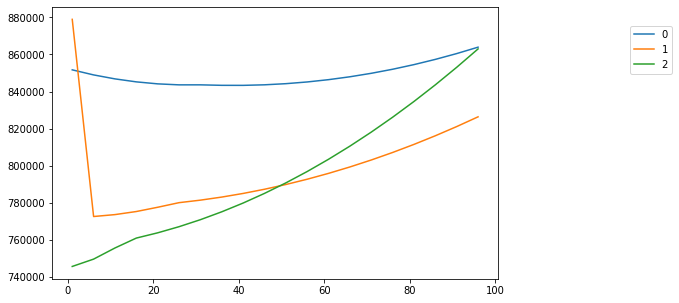

In [85]:

plt.figure(figsize=(8, 5))
for idx, feature in enumerate(mse_path.T):
    plt.plot(alphas_lacoscv,feature, label=idx)
plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))

In [34]:
print_coef_name(name=df.columns,w=coef_lacoscv)

[('season', 532.0189828413535), ('yr', 1015.0602226430595), ('mnth', -100.03952614356622), ('holiday', -83.2939598752991), ('weekday', 132.50446549095793), ('workingday', 51.55708561407394), ('weathersit', -330.55985673998117), ('temp', 370.6798550300367), ('atemp', 581.3969310654954), ('hum', -140.0074055006889), ('windspeed(mph)', -191.77140847135027), ('windspeed(ms)', -2.6855024557067635e-08)]


yr,atemp,season,temp,weathersit    
weathersit, windspeed, hum
windspeed(ms), workingday,holiday

In [39]:
list(coef_lacoscv)

[532.0189828413535,
 1015.0602226430595,
 -100.03952614356622,
 -83.2939598752991,
 132.50446549095793,
 51.55708561407394,
 -330.55985673998117,
 370.6798550300367,
 581.3969310654954,
 -140.0074055006889,
 -191.77140847135027,
 -2.6855024557067635e-08]

### Блок 3. Ответьте на вопросы (каждый 0.5 балла):

1. В последней обученной модели выберите 4 признака с наибольшими (положительными) коэфициентами (и выпишите их), посмотрите на визуализации зависимостей cnt от этих признаков, которые мы рисовали в блоке "Знакомство с данными". Видна ли возрастающая линейная зависимость cnt от этих признаков по графикам? Логично ли утверждать (из здравого смысла), что чем больше значение этих признаков, тем больше людей захотят взять велосипеды?
    * Ответ: *yr,atemp,season,temp* Линейная зависимость видна для признаков atemp,temp и , возможно, для yr. Ели бы мы не знали, что означают данные признаки, то да, но при очень высокой температуре по логичным соображения будут брать меньше велосипедов, чем при умерной температуре, т.е. cnt будет расти только до определенной температуры.
* Выберите 3 признака с наибольшими по модулю отрицательными коэффициентами (и выпишите их), посмотрите на соответствующие визуализации. Видна ли убывающая линейная зависимость? Логично ли утверждать, что чем больше величина этих признаков, тем меньше людей захотят взять велосипеды?
    * Ответ: *weathersit, windspeed, hum* Да.
* Выпишите признаки с коэффициентами, близкими к нулю (< 1e-3). Как вы думаете, почему модель исключила их из модели (вновь посмотрите на графики)? Верно ли, что они никак не влияют на спрос на велосипеды?
    * Ответ: *windspeed(ms)* так как этот признак коллинеарен к признаку windspeed(mph).